## call csv file

In [1]:
import pandas as pd

In [2]:
data_state= pd.read_csv('GlobalLandTemperaturesByState.csv')
data.head()

NameError: name 'data' is not defined

In [ ]:
data_city= pd.read_csv('GlobalLandTemperaturesByCity.csv')
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


## EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


In [ ]:
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


## Data Cleaning

In [ ]:
data_state['dt']=pd.to_datetime(data_state['dt'])
data_city['dt']=pd.to_datetime(data_state['dt'])

## Missing Values

In [ ]:
data_state.dropna(inplace=True)
data_city.dropna(inplace=True)

## Imput Missing Values

In [ ]:
mean_temp_state = data_state['AverageTemperature'].mean()
median_temp_unc_state = data_state['AverageTemperatureUncertainty'].median()

data_state.loc[data_state['AverageTemperature'].isnull(), 'AverageTemperature'] = mean_temp_state
data_state.loc[data_state['AverageTemperatureUncertainty'].isnull(), 'AverageTemperatureUncertainty'] = median_temp_unc_state

mean_temp_city = data_city['AverageTemperature'].mean()
median_temp_unc_city = data_city['AverageTemperatureUncertainty'].median()

data_city.loc[data_city['AverageTemperature'].isnull(), 'AverageTemperature'] = mean_temp_city
data_city.loc[data_city['AverageTemperatureUncertainty'].isnull(), 'AverageTemperatureUncertainty'] = median_temp_unc_city

data_state.isnull().sum()
data_city.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

## Grouping

In [ ]:
mean_temp_by_state = data_state.groupby(['State', 'dt'])['AverageTemperature'].mean().reset_index()
mean_temp_by_city = data_city.groupby(['City', 'dt'])['AverageTemperature'].mean().reset_index()  

In [ ]:
print("Shape of mean_temp_by_state:", mean_temp_by_state.shape)
print("Shape of mean_temp_by_city:", mean_temp_by_city.shape)

Shape of mean_temp_by_state: (620027, 3)
Shape of mean_temp_by_city: (579849, 3)


## plot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## Plot for States

Shape of city_data forA Coruña: (2941, 3)
Data for A Coruña:
        City         dt  AverageTemperature
0  A Coruña 1768-09-01               9.149
1  A Coruña 1768-10-01               7.619
2  A Coruña 1768-11-01               8.152
3  A Coruña 1768-12-01               6.418
4  A Coruña 1769-01-01               8.753
Shape of city_data forAachen: (2318, 3)
Data for Aachen:
         City         dt  AverageTemperature
2941  Aachen 1820-08-01               3.093
2942  Aachen 1820-09-01               2.220
2943  Aachen 1820-10-01               4.777
2944  Aachen 1820-11-01              10.551
2945  Aachen 1820-12-01              11.697
Shape of city_data forAalborg: (2318, 3)
Data for Aalborg:
          City         dt  AverageTemperature
5259  Aalborg 1820-08-01              -0.897
5260  Aalborg 1820-09-01               1.314
5261  Aalborg 1820-10-01              -0.849
5262  Aalborg 1820-11-01               5.577
5263  Aalborg 1820-12-01              10.760
Shape of city_data forAba: (

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9264\2414756705.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


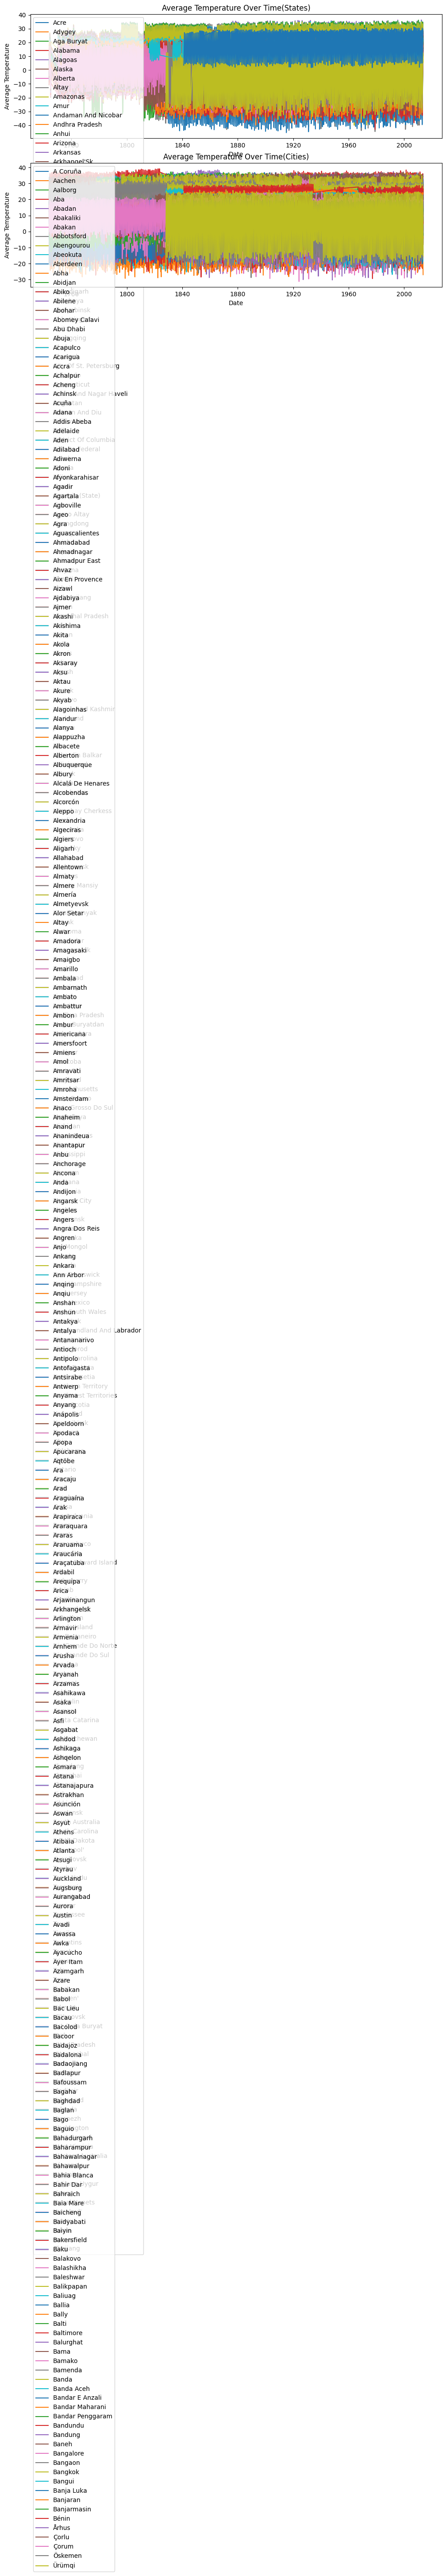

In [ ]:
fig,axes= plt.subplots(nrows=2,ncols=1,figsize=(12,8))
for state in mean_temp_by_state['State'].unique():
    state_data = mean_temp_by_state[mean_temp_by_state['State'] == state]
    axes[0].plot(state_data['dt'], state_data['AverageTemperature'], label=state)
    axes[0].set_title('Average Temperature Over Time(States)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Average Temperature')
axes[0].legend(loc='best')
for city in mean_temp_by_city['City'].unique():
    city_data = mean_temp_by_city[mean_temp_by_city['City']== city] 
    print(f"Shape of city_data for{city}:", city_data.shape) 
    print(f"Data for {city}:\n",city_data.head())
    axes[1].plot(city_data['dt'], city_data['AverageTemperature'], label=city)

axes[1].set_title('Average Temperature Over Time(Cities)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Average Temperature')
axes[1].legend(loc='best')

plt.tight_layout()
plt.show()

## Temperature Trends Over Time (States)

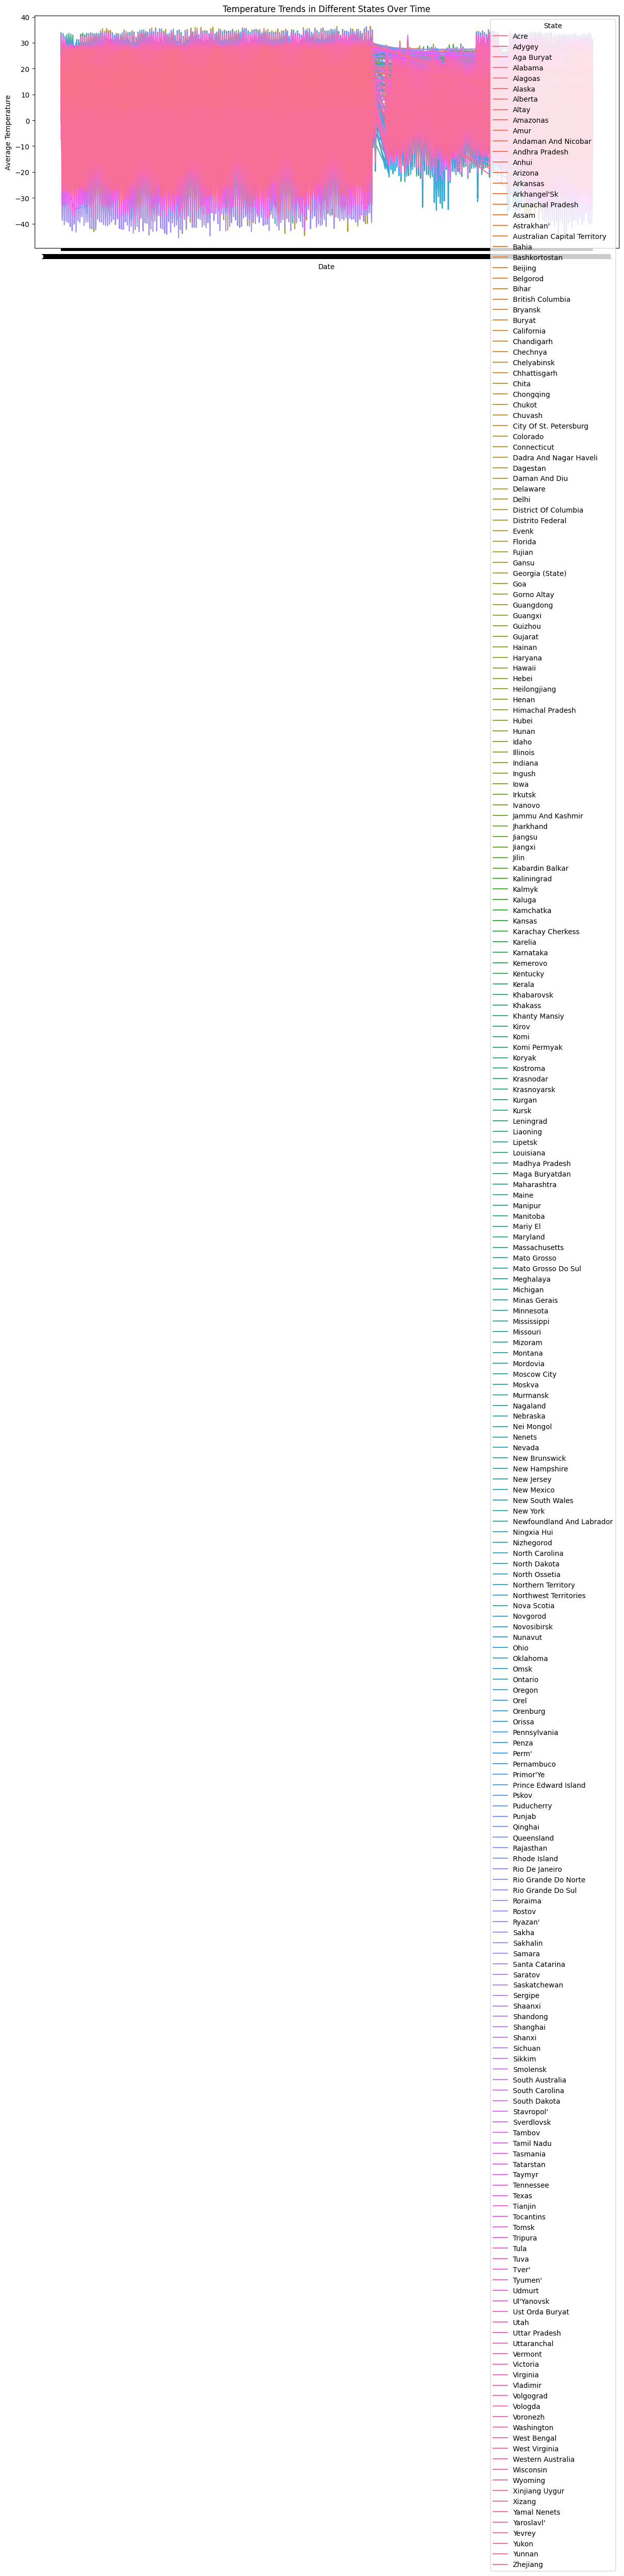

In [ ]:
plt.figure(figsize=(15, 6)) 
sns.lineplot(x='dt', y='AverageTemperature', hue='State', data=data_state)
plt.title('Temperature Trends in Different States Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.show()

## Temperature Distribution by State for a specific year

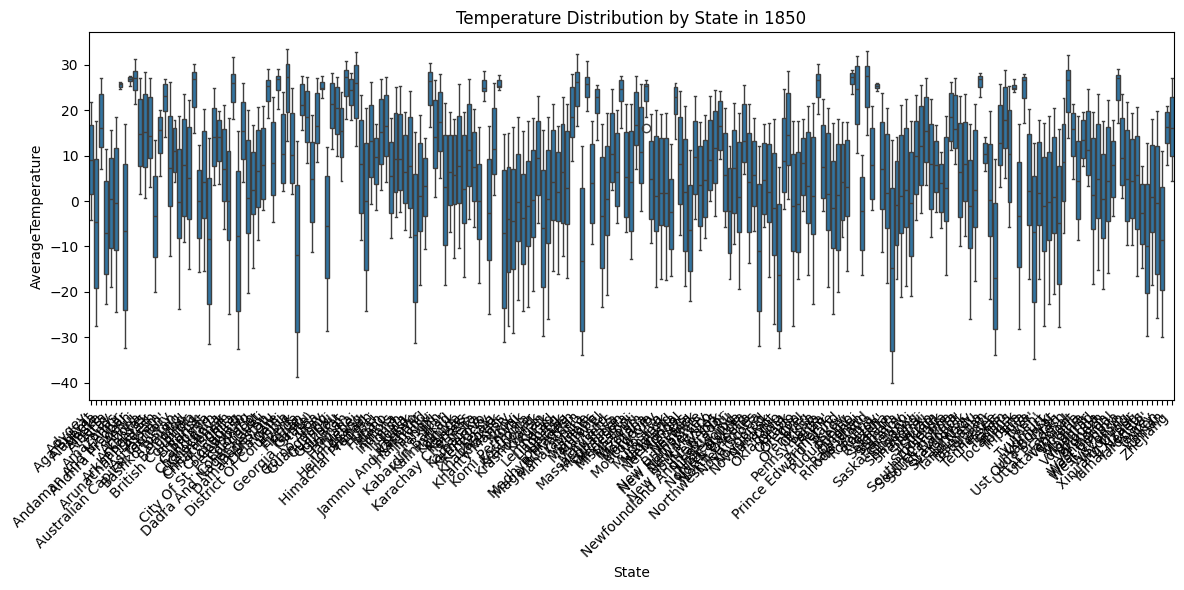

In [ ]:
data_state['dt']=pd.to_datetime(data_state['dt'])
year = 1850
state_data_year = data_state[data_state['dt'].dt.year == year]
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='AverageTemperature', data=state_data_year)
plt.title(f'Temperature Distribution by State in {year}')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

In [ ]:
print(data_state[data_state['State']=='Hawaii'])
print(data_state['State']=='Washington')
print(data_state['State']=='Arizona')
print(data_state['State']. unique())

               dt  AverageTemperature  AverageTemperatureUncertainty   State  \
153157 1883-01-01              20.248                          1.002  Hawaii   
153158 1883-02-01              20.139                          1.760  Hawaii   
153159 1883-03-01              20.508                          0.841  Hawaii   
153160 1883-04-01              21.751                          2.459  Hawaii   
153161 1883-05-01              22.553                          1.854  Hawaii   
...           ...                 ...                            ...     ...   
154720 2013-04-01              21.734                          0.380  Hawaii   
154721 2013-05-01              22.843                          0.322  Hawaii   
154722 2013-06-01              23.688                          0.345  Hawaii   
154723 2013-07-01              24.358                          0.320  Hawaii   
154724 2013-08-01              24.601                          0.380  Hawaii   

              Country  Year  
153157  U

## Locations

In [18]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6596\2043826161.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_state['AverageTemperature'].fillna(data_state['AverageTemperature'].mean(), inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6596\2043826161.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

Trend line for Hawaii: y = 0.0086x + 5.57
Warming rate for Hawaii: 0.0086 degrees per year
R-squared value for Hawaii: 0.49
Trend line for Arizona: y = 0.0054x + 4.91
Warming rate for Arizona: 0.0054 degrees per year
R-squared value for Arizona: 0.24
Trend line for Washington: y = 0.0061x + -4.11
Warming rate for Washington: 0.0061 degrees per year
R-squared value for Washington: 0.19


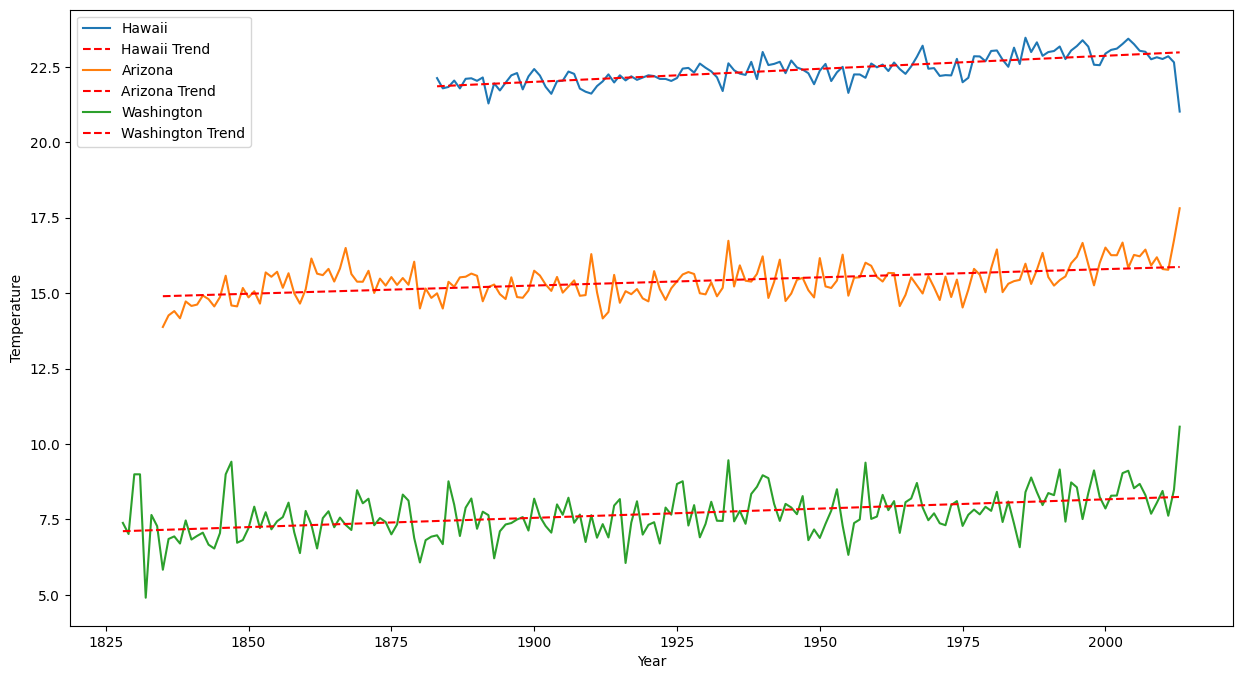

In [ ]:
# 1. Load and Clean Data 
data_state = pd.read_csv("GlobalLandTemperaturesByState.csv")  
data_city = pd.read_csv("GlobalLandTemperaturesByCity.csv") 

# Convert 'dt' to datetime64
data_state['dt'] = pd.to_datetime(data_state['dt'])
data_city['dt'] = pd.to_datetime(data_city['dt'])

# Missing Values 
data_state['AverageTemperature'].fillna(data_state['AverageTemperature'].mean(), inplace=True)
data_city['AverageTemperature'].fillna(data_city['AverageTemperature'].mean(), inplace=True)


# 2. Feature Engineering and Aggregation
data_state['Year'] = data_state['dt'].dt.year
data_city['Year'] = data_city['dt'].dt.year

yearly_temp_by_state = data_state.groupby(['Year', 'State'])['AverageTemperature'].mean().reset_index()
yearly_temp_by_city = data_city.groupby(['Year', 'City'])['AverageTemperature'].mean().reset_index()

# 3. Choose Locations to Compare
locations = ['Hawaii', 'Arizona', 'Washington']  

# 4. Plotting and Analysis
plt.figure(figsize=(15, 8))

for location in locations:
    # Initialize variables 
    slope = 0
    intercept = 0
    r_value = 0
    p_value = 0
    std_err = 0

    # Check if it's a state or city
    if location in yearly_temp_by_state['State'].unique():
        data = yearly_temp_by_state[yearly_temp_by_state['State'] == location]
        label = location  # Use the location name directly
    elif location in yearly_temp_by_city['City'].unique():
        data = yearly_temp_by_city[yearly_temp_by_city['City'] == location]
        label = location  # Use the location name directly
    else:
        print(f"Location '{location}' not found in the data.")
        continue  # Skip to the next location if not found

    # Convert 'Year' to numeric (Crucial for linregress)
    data['Year'] = pd.to_numeric(data['Year'])

    # Check for empty data 
    if data.empty:
        print(f"No data found for {location} after filtering.")
        continue  # Skip to the next location

    # Calculate Trend Line
    slope, intercept, r_value, p_value, std_err = linregress(data['Year'], data['AverageTemperature'])
    trend_line = slope * data['Year'] + intercept

    # Plot Data and Trend Line
    plt.plot(data['Year'], data['AverageTemperature'], label=label)
    plt.plot(data['Year'], trend_line, color='red', linestyle='--', label=f'{label} Trend')
    plt.legend()
    plt.ylabel('Temperature')
    plt.xlabel('Year')

    # Print Trend Line Info
    print(f"Trend line for {location}: y = {slope:.4f}x + {intercept:.2f}")
    print(f"Warming rate for {location}: {slope:.4f} degrees per year")
    print(f"R-squared value for {location}: {r_value**2:.2f}")  # Added R-squared